# K-means Clustering

L'algorithme $K$-means divise un ensemble de $N$ échantillons $X$ en $K$ clusters disjoints $C$, chacun étant décrit par la moyenne $\mu_j$ des échantillons dans le cluster. Les moyennes sont communément appelées les **« centroïdes des clusters »** ; notez qu'elles ne correspondent généralement pas à des points de $X$, bien qu'elles appartiennent au même espace. L'algorithme K-means vise à choisir des centroïdes qui minimisent l'inertie, ou la somme intra-cluster des carrés des distances :

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$

## Comment fonctionne l'algorithme

L'algorithme de clustering K-means utilise un raffinement itératif pour produire un résultat final. Les entrées de l'algorithme sont le nombre de clusters $K$ et l'ensemble de données. L'ensemble de données est une collection de caractéristiques pour chaque point. L'algorithme commence avec des estimations initiales des $K$ centroïdes, qui peuvent être générées aléatoirement ou sélectionnées aléatoirement dans l'ensemble de données. L'algorithme alterne ensuite entre deux étapes :

**Étape d'affectation des données** : Chaque centroïde définit un cluster. À cette étape, chaque point de données est assigné à son centroïde le plus proche, basé sur la distance euclidienne au carré. Plus formellement, si $c_i$ est la collection des centroïdes dans l'ensemble $C$, alors chaque point $x$ est assigné à un cluster basé sur :

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$

où dist( · ) est la distance euclidienne standard ($L_2$). Soit $S_i$ l'ensemble des points de données assignés à chaque $i$-ème centroïde.

**Étape de mise à jour des centroïdes** : À cette étape, les centroïdes sont recalculés en prenant la moyenne de tous les points assignés au cluster de ce centroïde.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$

L'algorithme alterne entre les étapes une et deux jusqu'à ce qu'un critère d'arrêt soit atteint (par exemple, aucun point de données ne change de cluster, la somme des distances est minimisée, ou un nombre maximal d'itérations est atteint).

**Convergence et initialisation aléatoire**

Cet algorithme est garanti de converger vers un résultat. Toutefois, le résultat peut être un optimum local (c'est-à-dire pas nécessairement le meilleur résultat possible). Ainsi, exécuter l'algorithme plusieurs fois avec des centroïdes de départ aléatoires peut donner un meilleur résultat.

<img src=https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif style="width: 500px;"/>


# **Part I**

**1. Importer les bibliothèques nécessaires:**
**numpy** avec l'alias np pour les opérations mathématiques.
**matplotlib.pyplot** avec l'alias plt pour la visualisation des données.
**pandas** avec l'alias pd pour la manipulation des données.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**2. Importer le jeu de données** 'Mall_Customers.csv' et extraire les colonnes 3 et 4 dans une variable `X` sous forme de tableau NumPy.

In [24]:
df=pd.read_csv('/content/Mall_Customers (2).csv')
x=df.iloc[:,[3,4]].values


**3. Convertir le jeu de données en DataFrame** Pandas et afficher son contenu.

In [26]:
df1=pd.DataFrame(x)
df1

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


**4. Tracer un nuage de points** représentant l'âge (Age) en fonction du revenu annuel (Annual Income).

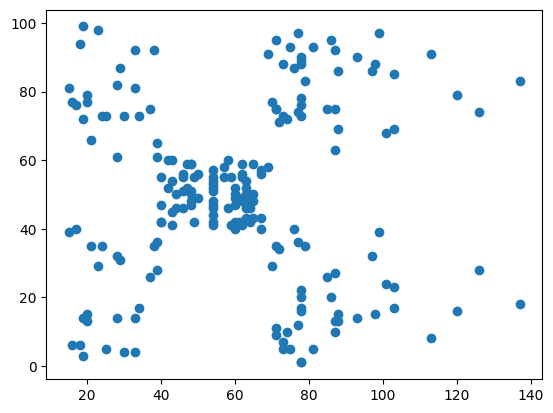

In [27]:
plt.scatter(x[:,0],x[:,1])


5. Utiliser la méthode du coude (Elbow Method) pour déterminer le **nombre optimal de clusters**.

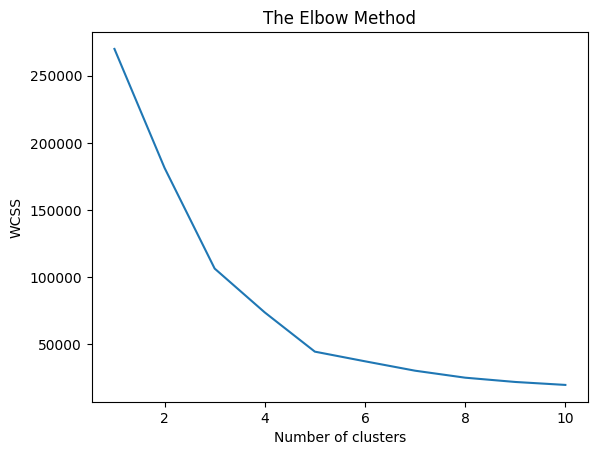

In [28]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  y=kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


6. Entraîner le modèle K-means sur les données avec k (nombre optimal) clusters et afficher les étiquettes prédites.

In [29]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y=kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


7. Prédire à quel cluster appartient un point avec un revenu annuel de 40 et un âge de 67 ans.

In [30]:
new_data_point = np.array([[67, 40]])
cluster_label = kmeans.predict(new_data_point)
print(cluster_label)


[0]


8. Visualiser les **clusters** formés ainsi que les **centroïdes** sur un graphique.

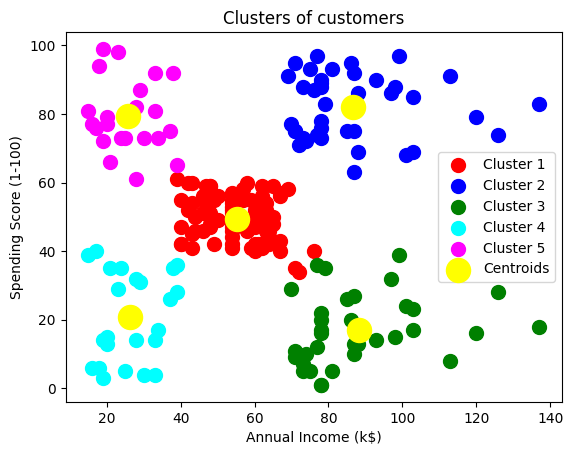

In [31]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# **Partie II**
## Les données (Data.CSV)

Pour ce projet, nous allons tenter d'utiliser le clustering KMeans pour regrouper les universités en deux groupes : privées et publiques. Nous utiliserons un DataFrame contenant 777 observations sur les 18 variables suivantes :

* **Private** : Un facteur avec les niveaux "No" et "Yes" indiquant si l'université est publique ou privée.
* **Apps** : Nombre de candidatures reçues.
* **Accept** : Nombre de candidatures acceptées.
* **Enroll** : Nombre de nouveaux étudiants inscrits.
* **Top10perc** : Pourcentage de nouveaux étudiants provenant des 10 % supérieurs de leur classe de lycée.
* **Top25perc** : Pourcentage de nouveaux étudiants provenant des 25 % supérieurs de leur classe de lycée.
* **F.Undergrad** : Nombre d'étudiants à temps plein.
* **P.Undergrad** : Nombre d'étudiants à temps partiel.
* **Outstate** : Frais de scolarité pour les étudiants hors de l'État.
* **Room.Board** : Coûts de logement et de repas.
* **Books** : Coûts estimés des livres.
* **Personal** : Dépenses personnelles estimées.
* **PhD** : Pourcentage de membres du corps professoral titulaires d'un doctorat.
* **Terminal** : Pourcentage de membres du corps professoral titulaires d'un diplôme terminal.
* **S.F.Ratio** : Ratio étudiants/professeurs.
* **perc.alumni** : Pourcentage d'anciens élèves qui font des dons.
* **Expend** : Dépenses d'enseignement par étudiant.
* **Grad.Rate** : Taux de diplomation.


### Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Lire le fichier 'College_Data.csv'** en utilisant la fonction 'read_csv' et définir la première colonne comme index.

In [50]:
df2=pd.read_csv('/content/data (2).csv',index_col=1)

2. Afficher le head() de la BD

In [51]:
df2.head()

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
apps,,,,,,,,,,,,,,,,,
1660,Yes,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2186,Yes,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
1428,Yes,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
417,Yes,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
193,Yes,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


2. Utiliser les méthodes 'info()' et 'describe()' pour explorer les caractéristiques des données.

In [52]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 1660 to 2989
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   accept       777 non-null    int64  
 2   enroll       777 non-null    int64  
 3   top10perc    777 non-null    int64  
 4   top25perc    777 non-null    int64  
 5   f_undergrad  777 non-null    int64  
 6   p_undergrad  777 non-null    int64  
 7   outstate     777 non-null    int64  
 8   room_board   777 non-null    int64  
 9   books        777 non-null    int64  
 10  personal     777 non-null    int64  
 11  phd          777 non-null    int64  
 12  terminal     777 non-null    int64  
 13  s_f_ratio    777 non-null    float64
 14  perc_alumni  777 non-null    int64  
 15  expend       777 non-null    int64  
 16  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 109.3+ KB


In [53]:
df2.describe()

,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


3. Créer un nuage de points de 'grad_rate' par rapport à 'room_board', en **colorant** les points **selon la colonne 'private'** et en affichant la ligne de régression.

In [54]:
print(df2.columns)

Index(['private', 'accept', 'enroll', 'top10perc', 'top25perc', 'f_undergrad',
       'p_undergrad', 'outstate', 'room_board', 'books', 'personal', 'phd',
       'terminal', 's_f_ratio', 'perc_alumni', 'expend', 'grad_rate'],
      dtype='object')


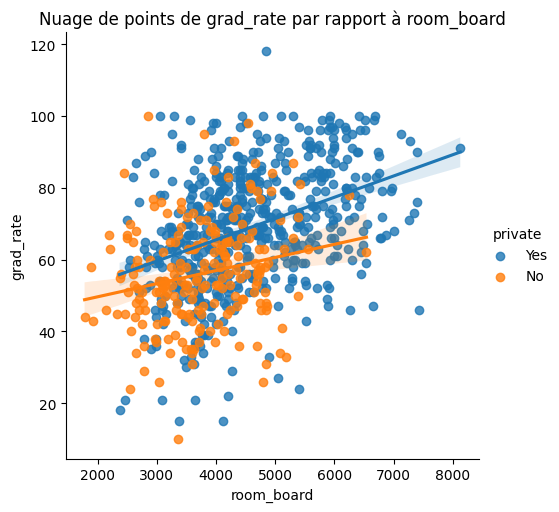

In [55]:
sns.lmplot(x='room_board', y='grad_rate', data=df2, hue='private', fit_reg=True)
plt.title('Nuage de points de grad_rate par rapport à room_board')
plt.xlabel('room_board')
plt.ylabel('grad_rate')
plt.show()

4. Créer un nuage de points de 'f_undergrad' par rapport à 'outstate', en colorant les points selon la colonne 'private'.

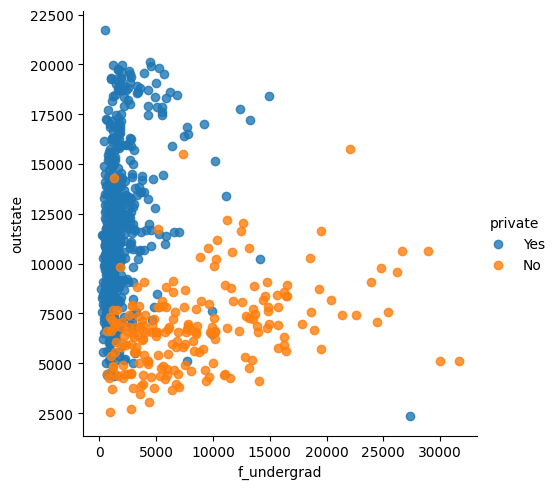

In [56]:
sns.lmplot(x='f_undergrad', y='outstate', data=df2, hue='private', fit_reg=False)

**5. Créer un boxplot du ratio étudiant-professeur (`s_f_ratio`) en fonction du type d'université (`private`).**

<Axes: xlabel='private', ylabel='s_f_ratio'>

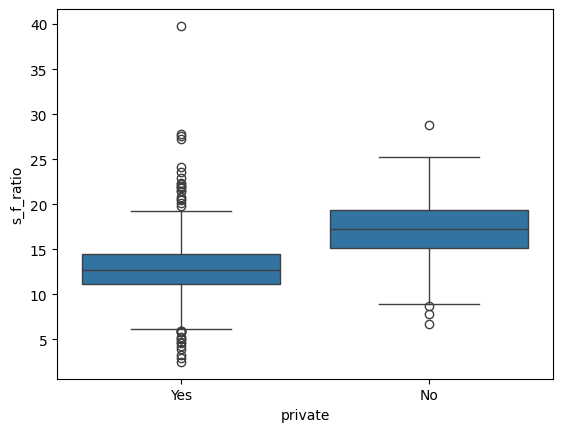

In [57]:
sns.boxplot(x='private', y='s_f_ratio', data=df2)

**6. Créer un boxplot du pourcentage d'anciens élèves qui font des dons (`perc_alumni`) en fonction du type d'université (`private`).**

<Axes: xlabel='private', ylabel='perc_alumni'>

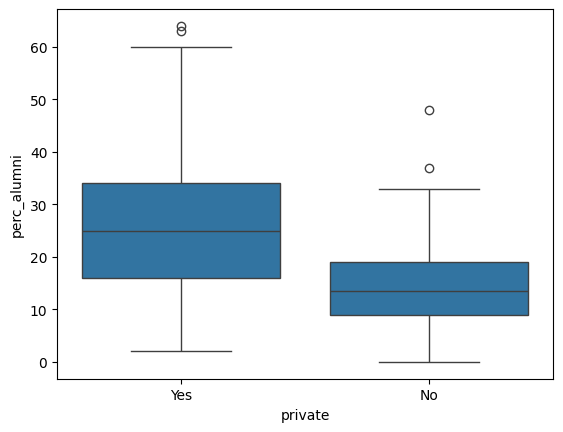

In [58]:
sns.boxplot(x='private', y='perc_alumni', data=df2)

**7. Créer un histogramme empilé montrant les frais de scolarité hors État (`outstate`) en fonction du type d'université (`private`).**

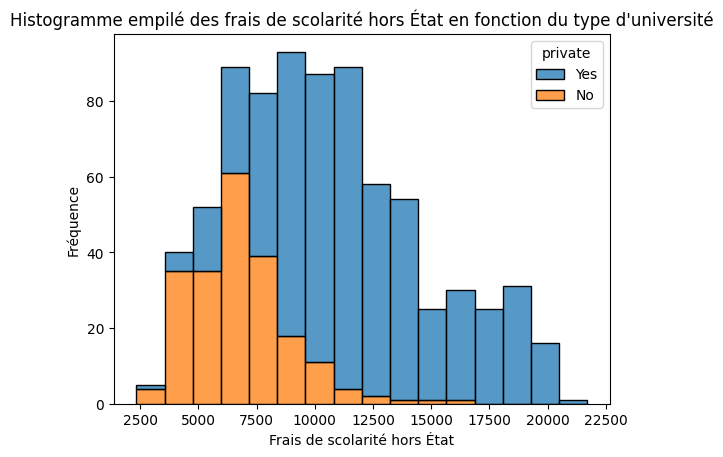

In [59]:
sns.histplot(data=df2, x='outstate', hue='private', multiple='stack')
plt.title('Histogramme empilé des frais de scolarité hors État en fonction du type d\'université')
plt.xlabel('Frais de scolarité hors État')
plt.ylabel('Fréquence')
plt.show()

**8. Quels sont les principaux écarts entre les frais de scolarité hors État (outstate) des universités privées et publiques ?**

Réponse

**9. Créer un histogramme empilé similaire pour la colonne grad_rate en fonction du type d'université (private).**

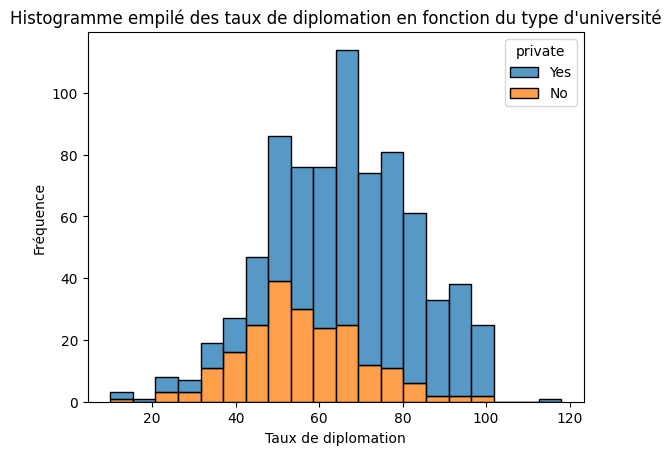

In [60]:
sns.histplot(data=df2, x='grad_rate', hue='private', multiple='stack')
plt.title('Histogramme empilé des taux de diplomation en fonction du type d\'université')
plt.xlabel('Taux de diplomation')
plt.ylabel('Fréquence')
plt.show()

**10. Quels types d'universités (privées ou publiques) ont tendance à avoir des taux de diplomation plus élevés ?**

**Réponse**
les universités privés ont un taux de diplomation plus élevés par rapport aux universités publiques

**11. Identifier les universités ayant un taux de diplomation (`grad_rate`) supérieur à 100 %.**  

**Question de réflexion :**  
- Cette valeur est-elle logique ? Si non, que pourriez-vous faire pour corriger cette anomalie ?  

In [61]:
df2[df2['grad_rate'] > 100]

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
apps,,,,,,,,,,,,,,,,,
3847,Yes,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Réponse**


**12. Remplacer toutes les valeurs de `grad_rate` supérieures à 100 par 100 à l'aide de la méthode `loc`.**   

In [64]:
df2.loc[df2['grad_rate'] > 100, 'grad_rate'] = 100


**13. Vérifiez si toutes les valeurs ont été correctement mises à jour.**

In [65]:
df2[df2['grad_rate'] > 100]

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
apps,,,,,,,,,,,,,,,,,


<Axes: xlabel='grad_rate', ylabel='Count'>

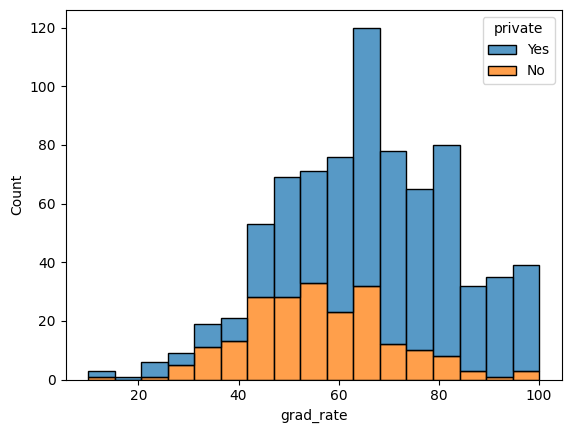

In [66]:
sns.histplot(data=df2, x='grad_rate', hue='private', multiple='stack')

## Création du classifieur K_Means

**14. Importer KMeans à partir du package SciKit Learn.**

In [67]:
from sklearn.cluster import KMeans

**15. Créer une instance d'un modèle K_Means avec k (nombre de classes) égale à 2.**

In [68]:
kmeans = KMeans(n_clusters=2)

**16. LAncer l'apprentissage du modèle.**

In [71]:
kmeans.fit(df2.drop('private', axis=1))

KMeans(n_clusters=2)

**17. Afficher les centres des classes extraites.**

In [72]:
kmeans.cluster_centers_

array([[2.27238028e+03, 7.20521127e+02, 4.90352113e+01, 7.64647887e+01,
        2.89436620e+03, 2.69471831e+02, 1.67899366e+04, 5.43545070e+03,
        5.67845070e+02, 1.02438732e+03, 8.73732394e+01, 9.31971831e+01,
        1.03929577e+01, 3.46056338e+01, 1.73644296e+04, 7.98309859e+01],
       [1.96209921e+03, 7.93267717e+02, 2.27559055e+01, 5.11748031e+01,
        3.88004409e+03, 9.86302362e+02, 9.02083307e+03, 4.11647874e+03,
        5.45251969e+02, 1.41136378e+03, 6.93700787e+01, 7.66850394e+01,
        1.49163780e+01, 2.00913386e+01, 7.93732913e+03, 6.22220472e+01]])

**14. Afficher les statistiques descriptives des universités privées à l'aide de la méthode `describe()`.**

In [73]:
df2[df2['private'] == 'Yes'].describe()

,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.966372
std,1369.549478,457.529136,17.851391,19.588360,2110.661773,722.370487,3707.470822,1089.697557,174.932303,632.879647,17.350886,15.450251,3.518573,12.400755,5682.576587,16.673032
min,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,2370.000000,250.000000,250.000000,8.000000,24.000000,2.500000,2.000000,3186.000000,15.000000
25%,501.000000,206.000000,17.000000,42.000000,840.000000,63.000000,9100.000000,3736.000000,450.000000,800.000000,60.000000,68.000000,11.100000,16.000000,7477.000000,58.000000
50%,859.000000,328.000000,25.000000,55.000000,1274.000000,207.000000,11200.000000,4400.000000,500.000000,1100.000000,73.000000,81.000000,12.700000,25.000000,8954.000000,69.000000
75%,1580.000000,520.000000,36.000000,70.000000,2018.000000,541.000000,13970.000000,5400.000000,600.000000,1500.000000,85.000000,92.000000,14.500000,34.000000,11625.000000,81.000000
max,13007.000000,4615.000000,96.000000,100.000000,27378.000000,10221.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


**15. Afficher les statistiques descriptives des universités publiques à l'aide de la méthode `describe()`.**

In [74]:
df2[df2['private'] == 'No'].describe()

,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3919.287736,1640.872642,22.834906,52.702830,8571.004717,1978.188679,6813.410377,3748.240566,554.377358,1676.981132,76.834906,82.816038,17.139151,14.358491,7458.316038,56.042453
std,3477.266276,1261.592009,16.180443,20.091058,6467.696087,2321.034696,2145.248389,858.139928,135.729935,677.515680,12.317525,12.069669,3.418049,7.518935,2695.541611,14.583412
min,233.000000,153.000000,1.000000,12.000000,633.000000,9.000000,2580.000000,1780.000000,96.000000,400.000000,33.000000,33.000000,6.700000,0.000000,3605.000000,10.000000
25%,1563.250000,701.750000,12.000000,37.000000,3601.000000,600.000000,5366.000000,3121.500000,500.000000,1200.000000,71.000000,76.000000,15.100000,9.000000,5715.000000,46.000000
50%,2929.500000,1337.500000,19.000000,51.000000,6785.500000,1375.000000,6609.000000,3708.000000,550.000000,1649.000000,78.500000,86.000000,17.250000,13.500000,6716.500000,55.000000
75%,5264.000000,2243.750000,27.500000,65.000000,12507.000000,2495.250000,7844.000000,4362.000000,612.000000,2051.250000,86.000000,92.000000,19.325000,19.000000,8570.250000,65.000000
max,26330.000000,6392.000000,95.000000,100.000000,31643.000000,21836.000000,15732.000000,6540.000000,1125.000000,4288.000000,103.000000,100.000000,28.800000,48.000000,16527.000000,100.000000


**16. Créer un DataFrame contenant les centres des clusters, en utilisant les noms des colonnes du DataFrame original, et déterminer si les étiquettes (0 ou 1) correspondent clairement aux universités privées ou publiques.**

In [75]:
df_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df2.columns[:-1])
df_centers

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend
0,2272.380282,720.521127,49.035211,76.464789,2894.366197,269.471831,16789.936620,5435.450704,567.845070,1024.387324,87.373239,93.197183,10.392958,34.605634,17364.429577,79.830986
1,1962.099213,793.267717,22.755906,51.174803,3880.044094,986.302362,9020.833071,4116.478740,545.251969,1411.363780,69.370079,76.685039,14.916378,20.091339,7937.329134,62.222047


**17. Afficher les étiquettes des clusters générées par le modèle K-Means à l'aide de l'attribut `labels_`.**

In [76]:
labels = kmeans.labels_
labels

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,

**18. Créer une nouvelle colonne appelée `Cluster` dans le DataFrame, où 1 représente une université privée et 0 une université publique, à l'aide d'une fonction de conversion.**  

In [78]:
c=np.where(labels==1,'Yes','No')
df2['Cluster']=c

In [79]:
df2.head()

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
apps,,,,,,,,,,,,,,,,,,
1660,Yes,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,Yes
2186,Yes,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,Yes
1428,Yes,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,Yes
417,Yes,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,No
193,Yes,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,Yes


**19. Créer une matrice de confusion et un rapport de classification pour évaluer la performance du clustering K-Means en comparant les étiquettes générées aux vraies étiquettes.**  

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(df2['private'], df2['Cluster'])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(df2['private'], df2['Cluster']))

Confusion Matrix:
[[  3 209]
 [139 426]]

Classification Report:
              precision    recall  f1-score   support

          No       0.02      0.01      0.02       212
         Yes       0.67      0.75      0.71       565

    accuracy                           0.55       777
   macro avg       0.35      0.38      0.36       777
weighted avg       0.49      0.55      0.52       777



## Performances de clustering (par exemple, distance entre les centroïdes)

**20. Créer deux DataFrames distincts contenant uniquement les données des universités privées (`private == 'Yes'`) et publiques (`private == 'No'`).**

In [81]:
df_private = df2[df2['private'] == 'Yes']
df_public = df2[df2['private'] == 'No']

**21. Ajuster les paramètres de `KMeans` tels que `max_iter` et `n_init`, puis calculer les distances entre les centroïdes des clusters et comparer les moyennes des universités privées et publiques.**

In [85]:
kmeans_private = KMeans(n_clusters=2, max_iter=300, n_init=10)

kmeans_private.fit(df_private.drop(['private', 'Cluster'], axis=1))
kmeans_public = KMeans(n_clusters=2, max_iter=300, n_init=10)

kmeans_public.fit(df_public.drop(['private', 'Cluster'], axis=1))
df_centers_private = pd.DataFrame(kmeans_private.cluster_centers_, columns=df_private.columns[:-2])
df_centers_public = pd.DataFrame(kmeans_public.cluster_centers_, columns=df_public.columns[:-2])

distance = np.linalg.norm(kmeans_private.cluster_centers_[0] - kmeans_private.cluster_centers_[1])
print("Distance between private university centroids:", distance)

distance = np.linalg.norm(kmeans_public.cluster_centers_[0] - kmeans_public.cluster_centers_[1])
print("Distance between public university centroids:", distance)

print("Private University Means:\n", df_centers_private.mean())
print("\nPublic University Means:\n", df_centers_public.mean())



Distance between private university centroids: 12785.358283780755
Distance between public university centroids: 13475.422561196763
Private University Means:
 private         1666.981978
accept           559.114839
enroll            38.124757
top10perc         65.427212
top25perc       2257.325523
f_undergrad      360.178398
p_undergrad    13916.589077
outstate        4965.094730
room_board       561.069688
books           1158.022024
personal          77.588125
phd               84.376185
terminal          11.728157
s_f_ratio         29.704585
perc_alumni    13754.056234
expend            73.377421
dtype: float64

Public University Means:
 private         4978.337677
accept          2050.921036
enroll            25.378284
top10perc         55.840869
top25perc      10785.535479
f_undergrad     2328.586290
p_undergrad     7179.000471
outstate        3835.786028
room_board       567.415280
books           1759.685819
personal          79.189482
phd               84.978493
terminal        